In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [21]:
def panorama(image_paths):
    stitcher = cv2.Stitcher_create()

    images = []
    for path in image_paths:
        image = cv2.imread(path)
        images.append(image)

# Perform image stitching
    status, stitched_image = stitcher.stitch(images)

    stitched_image = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB)

    return stitched_image

['kelas1_1.jpg', 'kelas1_2.jpg', 'kelas1_3.jpg', 'kelas1_4.jpg', 'kelas1_5.jpg']


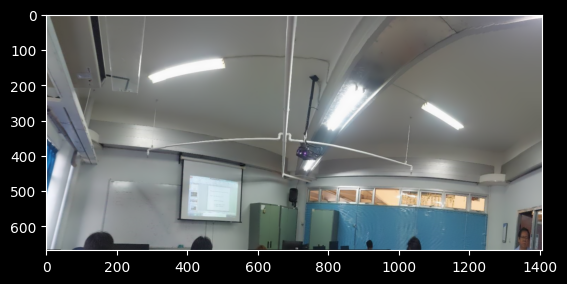

In [22]:

# Specify the paths to your images
image_paths=[]
for i in range (1,6):
  path = "kelas1_"+str(i)+".jpg"
  # path = "kelas "+str(i)+".jpg"
  image_paths.append(path)

print(image_paths)
stitched_image = panorama(image_paths)
# Display the stitched panorama image
plt.imshow(stitched_image)


In [23]:
def cropped_panorama(image):

    # Pad the image to avoid edge effects during processing
    padded_image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))

    # Convert to grayscale and threshold for better contour detection
    gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)
    thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

    # Plot the thresholded image (Optional)
    plt.figure(figsize=(10, 3))  # Adjust figure size as needed
    plt.subplot(1, 3, 1)
    plt.title("Thresholded Image")
    plt.imshow(thresh_img, cmap='gray')
    # plt.axis('off')  # Uncomment to hide axes (optional)

    # Find the largest external contour corresponding to the panorama area
    contours, _ = cv2.findContours(thresh_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    areaOI = max(contours, key=cv2.contourArea)

    # Create a mask with the bounding rectangle of the largest contour
    mask = np.zeros(thresh_img.shape, dtype="uint8")
    x, y, w, h = cv2.boundingRect(areaOI)
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

    # Erode the mask to remove noise and get a tighter bounding rectangle
    minRectangle = mask.copy()
    sub = mask.copy()

    while cv2.countNonZero(sub) > 0:
        minRectangle = cv2.erode(minRectangle, None)
        sub = cv2.subtract(minRectangle, thresh_img)

    # Plot the eroded mask (Optional)
    plt.subplot(1, 3, 2)
    plt.title("New Size")
    plt.imshow(minRectangle, cmap='gray')

    # Find contours on the eroded mask and extract the bounding rectangle
    contours, _ = cv2.findContours(minRectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    areaOI = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(areaOI)

    # Crop the original image using the final bounding rectangle
    cropped_image = image[y:y + h, x:x + w]

    # Plot the cropped panorama
    plt.subplot(1, 3, 3)
    plt.title("Cropped Panorama")
    plt.imshow(cropped_image)
    plt.axis('off')  # Hide axes for a cleaner presentation

    plt.tight_layout()
    plt.show()

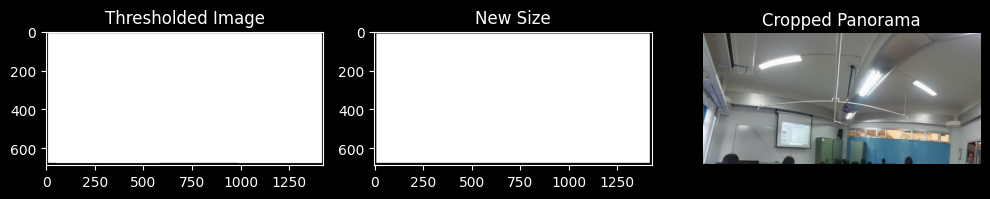

In [24]:
cropped_panorama(stitched_image)

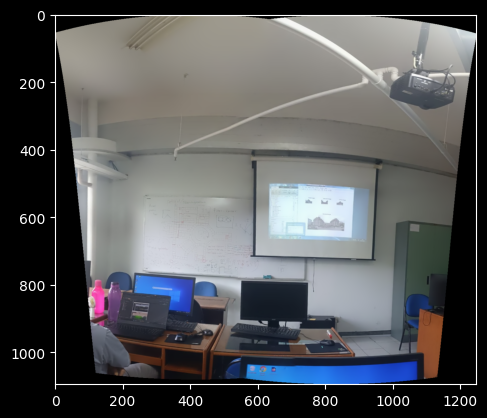

In [25]:
image_paths=[]
for i in range (1,4):
  path = "kelas "+str(i)+".jpg" 
  image_paths.append(path)

stitched_image = panorama(image_paths)
plt.imshow(stitched_image)

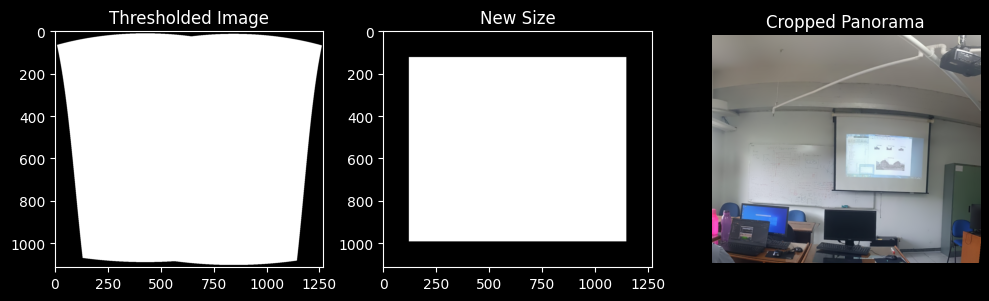

In [26]:
cropped_panorama(stitched_image)

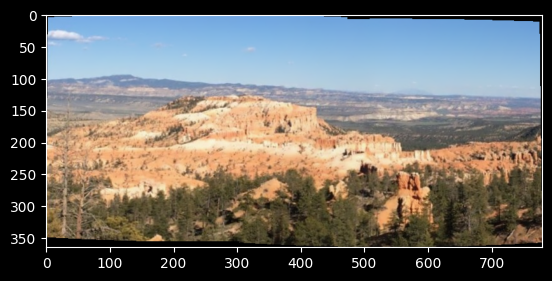

In [29]:
image_paths=[]
for i in range (1,3):
  path = "img"+str(i)+".jpg" 
  image_paths.append(path)

plt.imshow(panorama(image_paths))

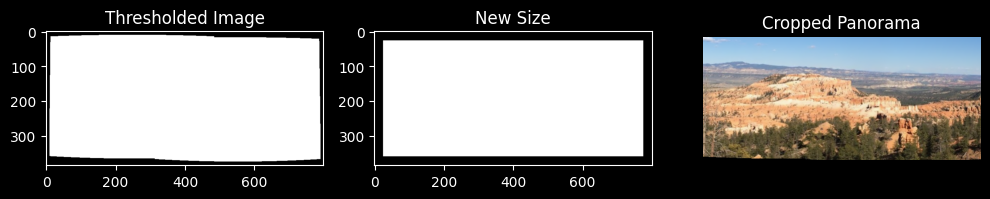

In [28]:
cropped_panorama(panorama(image_paths=image_paths))